# Аналитика в Яндекс.Афише

### Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
  
•	лог сервера с данными о посещениях сайта Яндекс.Афиши,

•	выгрузка всех заказов за этот период,   

•	статистика рекламных расходов.

Вы изучите:

•	как люди пользуются продуктом,

•	когда они начинают покупать,

•	сколько денег приносит каждый клиент

•	когда клиент окупается.



### Содержание

- [Подготовка данных](#id-Подготовка_данных)
- [Анализ_данных](#id-Анализ_данных)
- [Вывод](#id-Вывод)

<div id='id-Подготовка_данных'/>

### Шаг 1.Подготовка данных.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

Откроем и изучим файл visits (лог сервера с информацией о посещениях сайта).

In [4]:
visits_data = pd.read_csv('/datasets/visits_log.csv', sep=',')
display(visits_data.head())
visits_data.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В датасете visits_data содержится 5 столбцов и 359 400 строк. Пропущенных значений нет. 
Некорректный тип данных у столбцов с датами - строчный. Тип данных 'целые числа' для столбцов Source_Id  и uid корректен. Названия столбцов указаны в двух регистрах.

Названия столбцов:

•	Uid — уникальный идентификатор пользователя 

•	Device — категория устройства пользователя 

•	Start Ts — дата и время начала сессии 

•	End Ts — дата и время окончания сессии 

•	Source Id — идентификатор рекламного источника, из которого пришел пользователь 





Откроем и изучим файл orders (информация о заказах)

In [5]:
orders_data = pd.read_csv('/datasets/orders_log.csv', sep=',')
display(orders_data.head())
orders_data.info()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Датасет orders_data содержит 3 столбца и 50 415 строк. Пропущенных значений нет. Некорректный тип данных у столбца с датой Buy Ts - строчный. Типы данных 'целые числа' для столбца Uid  и 'вещественные числа' для столбца Revenue корректны. Названия столбцов указаны в двух регистрах.

Названия столбцов:

•	Uid — уникальный id пользователя, который сделал заказ

•	Buy Ts — дата и время заказа

•	Revenue — выручка Яндекс.Афиши с этого заказа





Откроем и изучим файл costs (информация о затратах на маркетинг).

In [6]:
costs_data = pd.read_csv('/datasets/costs.csv', sep=',')
display(costs_data.head())
costs_data.info()


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


В датасете costs_data 3 столбца и 2 542 строки. Пропущенных значений нет. Тип данных в столбце dt должен быть 'временной', а не 'строчный'. Остальные типы данных корректны - 'целые числа' в столбце source_id  и 'вещественные числа' в столбце costs.

Названия столбцов:

•	source_id — идентификатор рекламного источника

•	dt — дата

•	costs — затраты на этот рекламный источник в этот день




Переведем названия столбцов в visits_data  и orders_data в нижний регистр для удобства при возможном объединении.

In [7]:
visits_data.columns = visits_data.columns.str.lower()
orders_data.columns = orders_data.columns.str.lower()

Переименуем ключевой столбец 'source_id' в costs_data  в целях последующего объединения

In [8]:
costs_data = costs_data.rename(columns={"source_id": "source id"})
display(costs_data.head())

,source id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Во всех датасетах изменим тип данных в столбцах с датами

In [9]:
visits_data['end ts'] = pd.to_datetime(visits_data['end ts'], format = '%Y-%m-%d %H:%M')
visits_data['start ts'] = pd.to_datetime(visits_data['start ts'], format = '%Y-%m-%d %H:%M')
orders_data['buy ts'] = pd.to_datetime(orders_data['buy ts'], format = '%Y-%m-%d %H:%M')
costs_data['dt'] = pd.to_datetime(costs_data['dt'], format = '%Y-%m-%d')

Уточним, одновременно ли начато ведение всех файлов

In [10]:
visits_data['start ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start ts, dtype: object

In [11]:
orders_data['buy ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy ts, dtype: object

In [12]:
costs_data['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Все файлы начаты в одно время - 01.06.2017 и завершены 31.05.2018, кроме orders_data, который закончен 01.06.2018, возможно, необходимо полностью внести данные за последний день месяца включительно.

In [13]:
visits_data.info()
orders_data.info()
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div id='id-Анализ_данных'/>

### Шаг 2. Анализ данных.

#### 1. Анализ данных по продукту:

##### Сколько людей пользуются в день, неделю, месяц?
Выделим в отдельные столбцы год, месяц, неделю и полную дату пользовательской сессии и сгруппируем по уникальным пользователям.

In [14]:
visits_data['session_year']  = visits_data['start ts'].dt.year
visits_data['session_month'] = visits_data['start ts'].dt.month
visits_data['session_week']  = visits_data['start ts'].dt.week
visits_data['session_date'] = visits_data['start ts'].dt.date

dau_total = visits_data.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits_data.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits_data.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
display(int(dau_total))
display(int(wau_total))
display(int(mau_total))

907

5716

23228

Среднее количество пользователей сайта: 907 человек в день, 5 716 человек в неделю, 23 228 человек в месяц.

Создадим таблицу уникальных пользователей

In [15]:
unique_user = visits_data.groupby(['uid'])['start ts'].min().reset_index()
unique_user.columns = ['customer','reg_date']
unique_users_qty = unique_user['customer'].count()
print(unique_users_qty)

228169


##### Сколько сессий в день? 
Сгруппируем по дате сессии и посчитаем количество сессий и пользователей.
Чтобы найти среднее количество сессий в день на одного пользователя, разделим число сессий на количество пользователей в день. Для наглядности построим гистограмму количества сессий.

Среднее кол-во сессий в день на одного пользователя:  1.08


,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


Text(0, 0.5, 'кол-во пользователей')

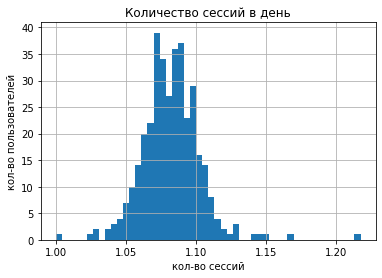

In [16]:
sessions_per_user = visits_data.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
mean_session = sessions_per_user['sessions_per_user'].mean().round(2)
print('Среднее кол-во сессий в день на одного пользователя: ', mean_session)
display(sessions_per_user)
sessions_per_user['sessions_per_user'].hist(bins=50)
plt.title("Количество сессий в день")
plt.xlabel("кол-во сессий")
plt.ylabel("кол-во пользователей")

В среднем, один пользователь проводит 1(одну) сессию в день на сайте Яндекс.Афиша. Это хороший показатель, т.к. он может означать, что пользователь посещает сайт ежедневно.

##### Сколько длится одна сессия?
Найдем среднюю продолжительность сессии или ASL в секундах. Построим гистограмму продолжительности сессии.

ASL:  0    60
dtype: int64
Средняя продолжительность сессии:  643.51
Медианная продолжительность сессии:  300.0


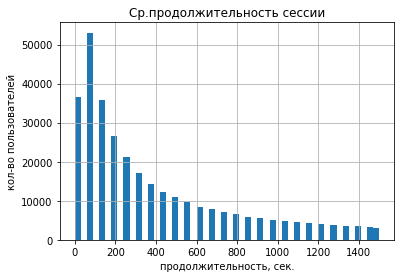

In [17]:
visits_data['session_duration'] = (visits_data['end ts'] - visits_data['start ts']).dt.seconds
visits_data['session_duration'].hist(bins=50, range=(0,1500))
plt.title("Ср.продолжительность сессии")
plt.xlabel("продолжительность, сек.")
plt.ylabel("кол-во пользователей")
asl = visits_data['session_duration'].mode()
print('ASL: ', asl)
session_mean = visits_data['session_duration'].mean().round(2)
print('Средняя продолжительность сессии: ', session_mean)
session_median = visits_data['session_duration'].median()
print('Медианная продолжительность сессии: ', session_median)

##### Как часто люди возвращаются?
Рассчитаем "коэффициент удержания" или Retention Rate по формуле: кол-во активных пользователей на n-ый lifetime / кол-во активных пользователей на 0 lifetime * 100%. 
Для этого сформируем когорты по месяцам активности и рассчитаем lifetime.

In [18]:
first_activity_date = visits_data.groupby(['uid'])['start ts'].min()
first_activity_date.name = 'first_activity_date'
visits_data = visits_data.merge(first_activity_date, on='uid', how='left')
visits_data['activity_month'] = visits_data['start ts'].astype('datetime64[M]')
visits_data['first_activity_month'] = visits_data['first_activity_date'].astype('datetime64[M]')
visits_data['cohort_lifetime'] = visits_data['activity_month'] - visits_data['first_activity_month']
visits_data['cohort_lifetime'] = (visits_data['cohort_lifetime'] / np.timedelta64(1,'M')).round().astype('int')

visits_data['first_activity_month'] = pd.to_datetime(visits_data['first_activity_month'], format = '%Y-%m-%d %H:%M')
visits_data['first_activity_month'] = visits_data['first_activity_month'].dt.date
visits_data['first_activity_date'] = pd.to_datetime(visits_data['first_activity_date'], format = '%Y-%m-%d %H:%M')

Сгруппируем данные по когорте и определим в ней пользователей для каждой недели lifetime.
Найдем исходное количество пользователей. 

In [19]:
cohorts = visits_data.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')


Рассчитаем Retention Rate. Для этого разделим количество пользователей в каждую последующую неделю на исходное количество пользователей в когорте и построим сводную таблицу со значением Retention Rate.

In [20]:
cohorts['retention_rate'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention_rate',aggfunc='sum').round(2)
#display(retention_pivot)

In [21]:
retention_pivot.fillna(' ')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.08,0.05,0.06,0.07,0.07,0.06,0.06,0.05,0.05,0.04,0.04
2017-07-01,1.0,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.04,0.03,0.03,
2017-08-01,1.0,0.08,0.06,0.06,0.05,0.04,0.04,0.04,0.03,0.03,,
2017-09-01,1.0,0.09,0.07,0.05,0.04,0.04,0.04,0.02,0.02,,,
2017-10-01,1.0,0.08,0.05,0.04,0.03,0.03,0.02,0.02,,,,
2017-11-01,1.0,0.08,0.04,0.04,0.03,0.02,0.02,,,,,
2017-12-01,1.0,0.06,0.04,0.03,0.02,0.02,,,,,,
2018-01-01,1.0,0.06,0.04,0.02,0.02,,,,,,,
2018-02-01,1.0,0.06,0.03,0.02,,,,,,,,


Построим тепловую карту для наглядности Retention Rate

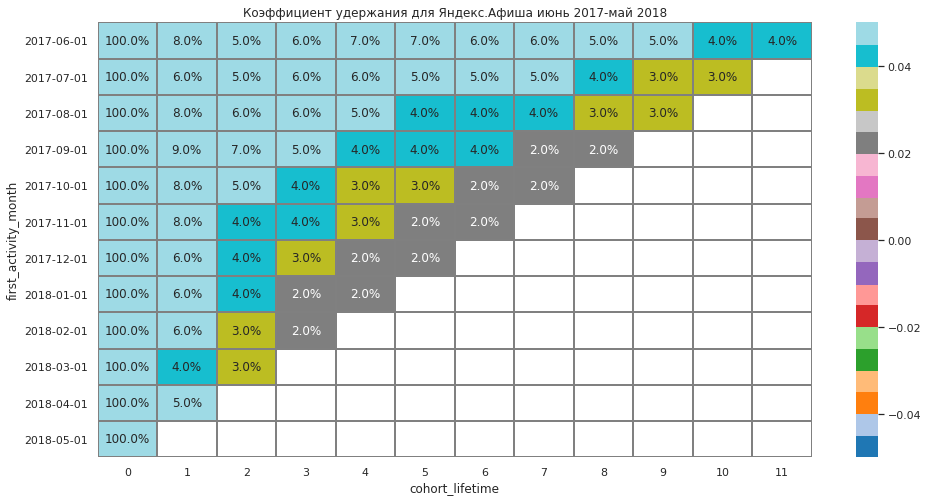

In [22]:
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Коэффициент удержания для Яндекс.Афиша июнь 2017-май 2018')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmin=-0.05, vmax=0.05, center= 0, cmap= 'tab20', linewidths=1, linecolor='gray')

Согласно тепловой карте Retention Rate убывает и горизонтально по всем 12 периодам lifetime, и вертикально вниз по недельным когортам. От первой когорты 01.06.2017 - 01.07.2017 до последней 01.05.18-31.05.18 коэффициент упал с 7,9% до 4,8%, причем на самой первом месяце жизни всех когорт. С каждой новой когортой возвращается все меньше пользователей. После прохождения половины срока жизни когорты (около 6 месяцев) в среднем возвращается около 4% пользователей. Возможно, необходимо детальнее сравнить, с какого устройства пользователи чаще пользуются сервисом, может быть, есть существенная разница в удобстве мобильной и настольной версии.

####  2. Продажи
##### Когда люди начинают покупать?

Необходимо исследовать поведение пользователя при заказе. Как быстро пользователь начинает делать заказ после первичного посещения? Какова продолжительность сессии при заказе? На каком периоде lifetime пользователь готов к покупкам?




Узнаем количество уникальных покупателей

In [23]:
unique_purchaser = orders_data.groupby(['uid'])['buy ts'].min().reset_index()
unique_purchaser.columns = ['purchaser','buy_date']
print('Кол-во уникальных покупателей:', unique_purchaser['purchaser'].count())

Кол-во уникальных покупателей: 36523


Объединим датасеты visits_data  и orders_data в общий датасет по пользователям users.

In [172]:
users = visits_data.merge(orders_data, on='uid')
display(users.head())


,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration,first_activity_date,activity_month,first_activity_month,cohort_lifetime,buy ts,revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2,2018-03-09 20:25:00,2.33
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01,0,2018-03-09 20:25:00,2.33
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0,2017-09-04 12:46:00,2.44
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0,2017-10-28 00:01:00,1.53
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0,2017-10-28 19:16:00,1.53


Найдем разницу между первым посещением и первым заказом на сайте.
Создадим отдельный столбец с разницей между двумя датами в днях.

In [275]:
users['buy_day'] = pd.to_datetime(users['buy ts'], unit='d') - pd.to_timedelta(users['buy ts'].dt.dayofweek,  unit='d')
users['first_day'] = pd.to_datetime(users['first_activity_date'], unit='d') - pd.to_timedelta(users['first_activity_date'].dt.dayofweek, unit='d')
users['visit_order_dif'] = users['buy_day'] - users['first_day']
users['visit_order_dif'] = users['visit_order_dif'] / np.timedelta64(1,'D')
users['visit_order_dif'] = users['visit_order_dif'].astype('int')
first_order_date = users.groupby('uid')['buy ts'].min()
first_order_date.name = 'first_order_date'
users = users.merge(first_order_date,on='uid')
users['first_order_month'] = users['first_order_date'].astype('datetime64[M]')
display(users.head())

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration,...,activity_month,first_activity_month,cohort_lifetime,buy ts,revenue,buy_day,first_day,visit_order_dif,first_order_date,first_order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,...,2018-05-01,2018-03-01,2,2018-03-09 20:25:00,2.33,2018-03-05 20:25:00,2018-03-05 20:05:00,0,2018-03-09 20:25:00,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,...,2018-03-01,2018-03-01,0,2018-03-09 20:25:00,2.33,2018-03-05 20:25:00,2018-03-05 20:05:00,0,2018-03-09 20:25:00,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,...,2017-09-01,2017-09-01,0,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-08-28 21:35:00,6,2017-09-04 12:46:00,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,...,2017-09-01,2017-09-01,0,2017-10-28 00:01:00,1.53,2017-10-23 00:01:00,2017-08-28 21:35:00,55,2017-09-04 12:46:00,2017-09-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,...,2017-09-01,2017-09-01,0,2017-10-28 19:16:00,1.53,2017-10-23 19:16:00,2017-08-28 21:35:00,55,2017-09-04 12:46:00,2017-09-01


Выясним, в какой период заказывает большинство пользователей

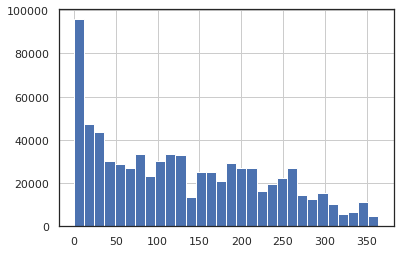

In [174]:
users['visit_order_dif'].hist(bins=30)

Интересно узнать, как долго проводит заказывающий пользователь на сайте, сколько может быть у него сессий в день.

In [175]:
session_order = users.query('revenue > 0')
sessions_order_per_user= session_order.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_order_per_user.columns = ['n_sessions', 'n_users']
sessions_order_per_user['sessions_per_user'] = sessions_order_per_user['n_sessions'] / sessions_order_per_user['n_users']
mean_session_order = sessions_order_per_user['sessions_per_user'].mean().astype('int')
print('Ср.продолжительность сессии у заказывающего пользователя в секундах: ',  session_order['session_duration'].mean().astype('int'))
print('Ср.кол-во сессий в день на заказывающего пользователя: ', mean_session_order)


Ср.продолжительность сессии у заказывающего пользователя в секундах:  1259
Ср.кол-во сессий в день на заказывающего пользователя:  9


Проверим продолжительность сессии и количество сессий  у пользователей, не принесших выручку. Необходимо учесть, что таких пользователей гораздо больше, т.к. далеко не все делают заказы.

In [176]:
session_not_order = users.query('revenue == 0')
sessions_not_order_per_user= session_not_order.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_not_order_per_user.columns = ['n_sessions', 'n_users']
sessions_not_order_per_user['sessions_per_user'] = sessions_not_order_per_user['n_sessions'] / sessions_order_per_user['n_users']
mean_session_not_order = sessions_not_order_per_user['sessions_per_user'].mean().round(2)
print('Ср.продолжительность сессии у пользователя, не делающего заказы, в секундах: ',  session_not_order['session_duration'].mean().round(2))
print('Ср.кол-во сессий в день на пользователя, не делающего заказы: ', mean_session_not_order)



Ср.продолжительность сессии у пользователя, не делающего заказы, в секундах:  1407.85
Ср.кол-во сессий в день на пользователя, не делающего заказы:  0.04


Мы выяснили, что пользователю достаточно 9 сессий в день, чтобы начать делать заказы. При этом продолжительность одной сессии составляет 1259 секунд или 20 минут. Это достаточно много времени - пользователь реально детально изучает предложения или процедура заказов такая долгая? Напротив, пользователь, не делающий заказы, заходит на сайт гораздо реже, точно не каждый день. Хотя продолжительность сессии у него дольше - до 1407 секунд/23 минут. Возможно, нужно так привлекать пользователя, чтобы он заходил на сайт ежедневно и более одного раза.

##### Сколько раз покупают за период?
Посчитаем количество покупок за следующие периоды:
- год (с июня 2017 г. по май 2018 г.)
- месяц
- день

In [177]:
purchase_qty = orders_data['revenue'].count().sum()
mean_purchase_month = (purchase_qty / 6).astype('int')
mean_purchase_day = (purchase_qty / 365).astype('int')
print('Общее количество покупок за период июнь 2017 - май 2018: ', purchase_qty)
print('Общее количество покупок в месяц: ', mean_purchase_month)
print('Общее количество покупок в день: ', mean_purchase_day)



Общее количество покупок за период июнь 2017 - май 2018:  50415
Общее количество покупок в месяц:  8402
Общее количество покупок в день:  138


Рассчитаем среднее количество покупок в год, месяц и день на одного пользователя, используя переменные по ср.кол-ву пользователей в данные периоды.

In [178]:
print('Среднее количество покупок в год на одного пользователя: ', (purchase_qty / unique_users_qty).round(2))
print('Среднее количество покупок в месяц на одного пользователя: ', (mean_purchase_month / mau_total).round(2))
print('Среднее количество покупок в день на одного пользователя: ', (mean_purchase_day / dau_total).round(2))


Среднее количество покупок в год на одного пользователя:  0.22
Среднее количество покупок в месяц на одного пользователя:  uid    0.36
dtype: float64
Среднее количество покупок в день на одного пользователя:  uid    0.15
dtype: float64


##### Какой средний чек?


Посчитаем общий средний чек по всем продажам

In [179]:
total_revenue = orders_data['revenue'].sum().round(2)
print('Общая выручка за период в рублях: ', total_revenue)
print('Общий средний чек в рублях: ', (orders_data['revenue'].sum() / purchase_qty).round(2))


Общая выручка за период в рублях:  252057.2
Общий средний чек в рублях:  5.0


Рассчитаем изменение среднего чека по когортам, которые сгруппируем по дате заказа.

Определим первый месяц заказа

In [180]:
first_order_date = orders_data.groupby('uid')['buy ts'].min()
first_order_date.name = 'first_order_date'
orders = orders_data.merge(first_order_date,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
display(orders.head())

,buy ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


Определим количество покупателей в месяц

In [181]:
buyers = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
buyers.columns = ['first_order_month', 'buyers']
display(buyers)


,first_order_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 

In [182]:
orders_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
display(orders_cohorts)


,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


Объединим таблицы, чтобы добавить первичных покупателей

In [183]:
report = pd.merge(buyers, orders_cohorts, on='first_order_month')
print(report.head())


  first_order_month  buyers order_month  revenue
0        2017-06-01    2023  2017-06-01  9557.49
1        2017-06-01    2023  2017-07-01   981.82
2        2017-06-01    2023  2017-08-01   885.34
3        2017-06-01    2023  2017-09-01  1931.30
4        2017-06-01    2023  2017-10-01  2068.58


Найдем средний чек по каждой когорте и построим сводную таблицу его изменения по ежемесячным когортам и lifetime.


In [184]:

report['revenue_per_cohort'] = (report['revenue'] / report['buyers']).round(2)
report['cohort_lifetime'] = report['order_month'] - report['first_order_month']
report['cohort_lifetime'] = (report['cohort_lifetime'] / np.timedelta64(1,'M')).round().astype('int')
report['first_order_month'].dt.strftime('%d.%m.%Y')

revenue_per_cohort_pivot = report.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_cohort',aggfunc='mean')
#display(revenue_per_user_pivot)


In [185]:
revenue_per_cohort_pivot.fillna(' ')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Посчитаем сумму выручки на каждую когорту

In [186]:
revenue_per_cohort = report.pivot_table(index='first_order_month', values='revenue',aggfunc='sum')
display(revenue_per_cohort)

,revenue
first_order_month,
2017-06-01,24031.69
2017-07-01,16127.92
2017-08-01,11606.26
2017-09-01,34676.32
2017-10-01,27603.45
2017-11-01,26098.99
2017-12-01,33485.74
2018-01-01,16663.13
2018-02-01,16750.50


С каждой новой когортой в первом сроке ее жизни наблюдается падение среднего чека с 6 до 3 рублей.
Чек уменьшается с каждым lifetime. Плюс почти все когорты сразу начинают с суммы,  близко к среднему чеку - 5 рублей, но в следующем месяце продажи падают. Самые высокие чеки в первые месяцы жизни когорт. Возможно, пользователи заходят, чтобы сделать заказ однократно. Самыми прибыльными по общей выручке были сентябрьская и декабрьская когорты.

##### Сколько денег приносят? (LTV)

Нам нужно рассчитать LTV - lifetime value, т.е. сколько итоговой валовой прибыли в среднем приносит один заказчик.

У нас уже есть таблица по месячным когортам. 
Примем за валовую прибыль известную нам выручку

Чтобы найти LTV разделим выручку когорт за каждый месяц на общее число пользователей в каждой когорте и создадим сводную таблицу со средним значением LTV в каждой когорте

In [187]:
report['ltv'] = (report['revenue'] / report['buyers']).round(2)
ltv_pivot = report.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='ltv', 
        aggfunc='mean')
#display(ltv_pivot)


In [188]:
ltv_pivot.fillna(' ')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Посчитаем средний LTV по каждой когорте отдельно и по всем когортам суммируем общий показатель

In [189]:
ltv_cohorts =report.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts.columns = ['first_order_month','ltv_sum', 'ltv_mean']
display(ltv_cohorts)


,first_order_month,ltv_sum,ltv_mean
0,2017-06-01,11.88,0.99
1,2017-07-01,8.40,0.76
2,2017-08-01,8.47,0.85
3,2017-09-01,13.43,1.49
4,2017-10-01,6.36,0.80
5,2017-11-01,6.38,0.91
6,2017-12-01,7.65,1.27
7,2018-01-01,4.93,0.99
8,2018-02-01,4.59,1.15
9,2018-03-01,5.46,1.82


In [190]:
ltv_mean = ltv_cohorts['ltv_sum'].mean().round(2)
print('Общий средний LTV:', ltv_mean) 

Общий средний LTV: 6.99


Значит, каждый покупатель из нулевой когорты принес прибыли по 11.88 рублей за весь срок жизни когорты, из когорты 9 - 5.46 рубля. В среднем, каждый покупатель всех когорт принес по 6.99 рублей.
При этом каждый покупатель из нулевой когорты ежемесячно приносил по 0.99, а из когорты 11 - по 1.82 (так как ее срок жизни гораздо меньше).

Построим 'ящик с усами' для визуализации среднего значения LTV

Text(0, 0.5, 'LTV')

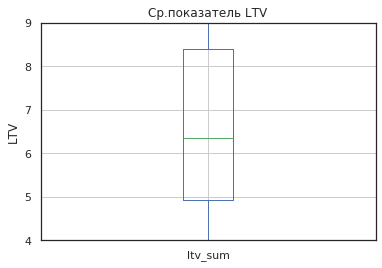

In [191]:
ltv_cohorts.boxplot(['ltv_sum'])
plt.ylim(4, 9)
plt.title('Ср.показатель LTV')
plt.ylabel('LTV')

Среднее значение суммированного по когортам LTV составляет около 6.5-7 рублей за весь срок жизни всех когорт. Самой доходной была когорта '2017-09-01' с LTV 13 рублей. Последние по дате когорты приносили прибыли ниже среднего в 2-3 раза, причем в сумме.

#### 3.Маркетинг

##### Сколько денег потратили? Всего / на каждый источник / по времени

Переходим к работе над датасетом costs_data. Необходимо понять структуру затрат на маркетинг.

Выясним, сколько всего потратили денег на маркетинговые расходы

In [192]:
total_costs = costs_data['costs'].sum().round(2)
print('Общие затраты на маркетинг за период в рублях: ', total_costs)


Общие затраты на маркетинг за период в рублях:  329131.62


Затраты на маркетинг достаточно высокие, они превышают выручку за тот же период - 252 057 рублей на 77 074 рубля, но, возможно, это вопрос распределения и реструктуризации маркетингового бюджета. 

###### Выясним, сколько денег потратили на каждый рекламный источник

In [193]:
costs_per_source = costs_data.groupby(['source id']).agg({'costs': ['sum']})
costs_per_source.columns = ['source_costs']
costs_per_source['source_costs'].mean()
print('Ср.маркетинговые расходы на рекламный источник', costs_per_source['source_costs'].mean().round(0))
display(costs_per_source)

Ср.маркетинговые расходы на рекламный источник 47019.0


,source_costs
source id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Построим гистограмму ТОП-рекламных источников по финансированию

Text(0, 0.5, 'сумма маркетинговых расходов')

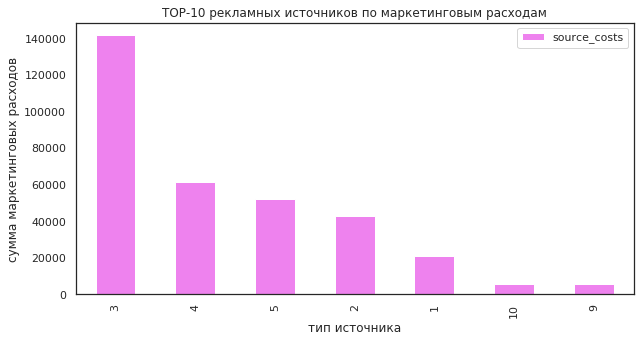

In [194]:
costs_per_source.sort_values(by='source_costs', ascending=False).plot(y='source_costs', kind='bar', figsize=(10, 5), color='violet')
plt.title("TOP-10 рекламных источников по маркетинговым расходам")
plt.xlabel("тип источника")
plt.ylabel("сумма маркетинговых расходов")


Всего использовано 10 видов рекламных источников. В среднем, на каждый источник выделено 47 019 рублей. Больше всего вложено денег  в источник 3 (141 322 рубля), что составляет почти 43% годового маркетингового бюджета. В источники 4, 5, 2 вложено в 2-3 раза меньше - около 40-60 000 рублей. Наименее финансируемые - источники 10 и 9 по 5500 рублей. На рекламные источники 6, 7, 8 финансирования не выделялось.

###### Рассмотрим, как деньги распределены по времени

Построим временные когорты по месяцу для исследования маркетинговых затрат

In [195]:
first_costs_date = costs_data.groupby(['source id'])['dt'].min()
first_costs_date.name = 'first_costs_date'
costs = costs_data.join(first_costs_date,on='source id')
costs['first_costs_month'] = costs['first_costs_date'].astype('datetime64[M]')
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

costs_cohorts = costs.groupby(['first_costs_month', 'costs_month', 'source id']).agg({'costs':'sum'}).reset_index()
display(costs_cohorts.head(20))

,first_costs_month,costs_month,source id,costs
0,2017-06-01,2017-06-01,1,1125.61
1,2017-06-01,2017-06-01,2,2427.38
2,2017-06-01,2017-06-01,3,7731.65
3,2017-06-01,2017-06-01,4,3514.80
4,2017-06-01,2017-06-01,5,2616.12
5,2017-06-01,2017-06-01,9,285.22
6,2017-06-01,2017-06-01,10,314.22
7,2017-06-01,2017-07-01,1,1072.88
8,2017-06-01,2017-07-01,2,2333.11
9,2017-06-01,2017-07-01,3,7674.37


Выясним, какие суммы ежемесячно тратились на маркетинг. Сформируем когорты по месяцу расходов, т.к. первый месяц у всех равен дате начала ведения файла.

In [196]:
costs_cohorts['costs_per_source'] = (costs_cohorts['costs'] / costs_cohorts['source id']).round(2)
costs_cohorts['cohort_lifetime'] = costs_cohorts['costs_month'] - costs_cohorts['first_costs_month']
costs_cohorts['cohort_lifetime'] = (costs_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')).round().astype('int')
costs_cohorts['costs_month'].dt.strftime('%d.%m.%Y')
costs_per_month_pivot = costs_cohorts.pivot_table(index=['costs_month'],values='costs', aggfunc='sum')
display(costs_per_month_pivot)

,costs
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Согласно данной таблице мы видим, что больше всего финансировались маркетинговые мероприятия с октября по ноябрь. Возможно, в связи с предпраздничными мероприятими.  Первые три месяца - с июня по август расходы были меньше всего. 

###### исправлено

Рассчитаем средний расход в месяц

In [197]:
costs_per_month = costs_cohorts.groupby('costs_month').agg({'costs': 'sum'})
costs_per_month.columns = ['month_costs']
costs_per_month['month_costs'].mean()
print('Ср.маркетинговые расходы в месяц', costs_per_month['month_costs'].mean().round())
#display(costs_per_month)

Ср.маркетинговые расходы в месяц 27428.0


Расходы на маркетинг выделялись ежемесячно с сезонными пиками с октября 2017 г. до марта 2018 г., т.е. в праздничные периоды расходы увеличивались. Больше всего было выделено в декабре 2017 г. - 38 315 рублей. В среднем общий ежемесячный маркетинговый бюджет составлял 27 428 рублей.

Посмотрим, сколько выделялось каждый месяц на конкретный рекламный источник

In [198]:
costs_per_source = costs_cohorts.pivot_table(index=['costs_month'], columns='source id',values='costs_per_source', aggfunc='sum')
display(costs_per_source)

source id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,1125.61,1213.69,2577.22,878.70,523.22,31.69,31.42
2017-07-01,1072.88,1166.55,2558.12,882.43,599.63,33.62,32.98
2017-08-01,951.81,905.53,2047.85,804.34,437.06,27.66,23.26
2017-09-01,1502.01,1492.83,3321.18,1298.06,769.83,46.18,46.07
2017-10-01,2315.75,2422.50,5245.75,1605.21,1153.48,67.71,62.72
2017-11-01,2445.16,2623.84,5675.11,1347.21,1265.07,75.91,79.24
2017-12-01,2341.20,2448.90,5406.51,1920.12,1174.50,73.11,64.59
2018-01-01,2186.18,2078.87,4936.26,1458.20,1074.30,60.80,61.43
2018-02-01,2204.48,2237.17,4742.85,1427.99,1014.26,61.28,48.09


Построим график распределения расходов по каждому рекламному источнику в месяц

(0, 2700)

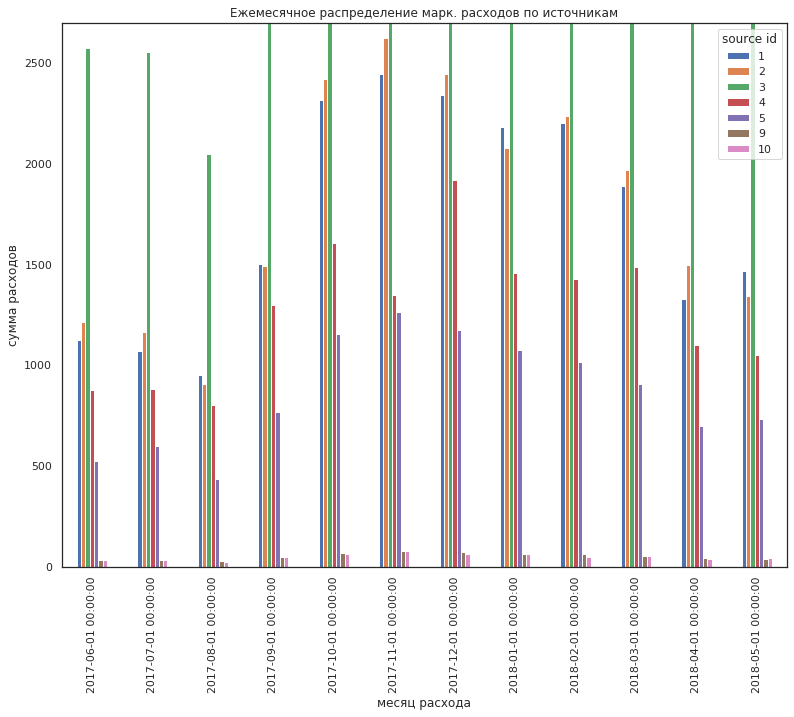

In [362]:
costs_per_source.plot(kind='bar', figsize=(13, 10), legend=True)
plt.title("Ежемесячное распределение марк. расходов по источникам")
plt.xlabel("месяц расхода")
plt.ylabel("сумма расходов")
plt.ylim(0, 2700)

Ежемесячные расходы распределялись между источниками неравномерно. Как мы выяснили ранее, самый финансируемый источник 3, ежемесячно на него также выделялось гораздо больше средств, особенно в праздничный сезон. Источники 1 и 2 на 2-месте по ежемесячному финансированию, далее источники 4 и 5. Самые нефинансируемые - 9 и 10. Можно сделать вывод, что приоритизация источников равномерно сохранена на протяжение всего года. Не наблюдается пиков финансирования разных источников от месяца к месяцу.

##### Устройства пользователей

Определим, сколько всего устройств пользователей, и как они распределены по рекламным источникам.
Сгуппируем visits_data по типу устройств пользователя и рекламному источнику

In [200]:
devices = visits_data.pivot_table(index=['device'], columns ='source id', values='uid', aggfunc=['nunique'])
display(devices.head())


nunique                                               
source id      1      2      3      4      5  6   7     9     10
device                                                          
desktop     13172  18257  57420  55607  42053  5  26  7079  5763
touch        6094   8609  18600  29313  15375  1   8  2402  2381

Вычислим, сколько всего устройств каждого типа

In [201]:
desktop_sum = devices.loc['desktop'].sum()
touch_sum = devices.loc['touch'].sum()
device_sum = desktop_sum + touch_sum
print('Общее количество устройств пользователя типа desktop: ', desktop_sum)
print('Общее количество устройств пользователя типа touch: ', touch_sum)
print('Всего устройств пользователя за период: ', device_sum)

Общее количество устройств пользователя типа desktop:  199382
Общее количество устройств пользователя типа touch:  82783
Всего устройств пользователя за период:  282165


Построим график сравнения по количеству устройств каждого типа

Text(0, 0.5, 'кол-во новых пользователей')

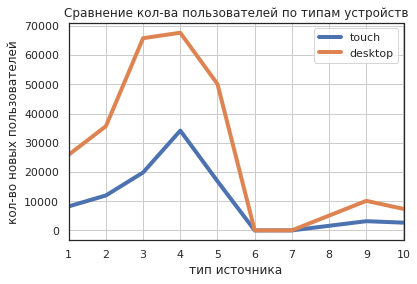

In [202]:
touch = ["touch"]
ax = visits_data.query('device == @touch').groupby('source id')['device'].count().plot(x='source id', y='device', kind='line', title='Сравнение кол-ва пользователей по типам устройств', label="touch", linewidth=4, grid=True, legend=True)

def_device = ["desktop"]
for element in def_device:
    visits_data.query('device == @element').groupby('source id')['device'].count().plot(x='source id', y='device', kind='line', title='Сравнение кол-ва пользователей по типам устройств', ax=ax, label=element, linewidth=4, legend=True, grid=True)
plt.xlabel("тип источника")
plt.ylabel("кол-во новых пользователей")

Общее количество устройств 282 165 больше, чем 228 169 уникальных пользователей, т.е. некоторые пользователи пользуются и настольными, и мобильными устройствами. При этом мобильных устройств используется только 30% от общего количества устройств. Наибольшее количество пользователей пришли из рекламных источников 3, 4, 5, куда было вложено больше всего расходов. Далее идут пользователи из источников 1 и 2, наименьшее количество от источников 9 и 10. Практически не сработали источники 6, 7, 8, но на них и не было расходов. Количество новых пользователей соответствует объему маркетинговых расходов.

Text(0, 0.5, 'кол-во новых пользователей')

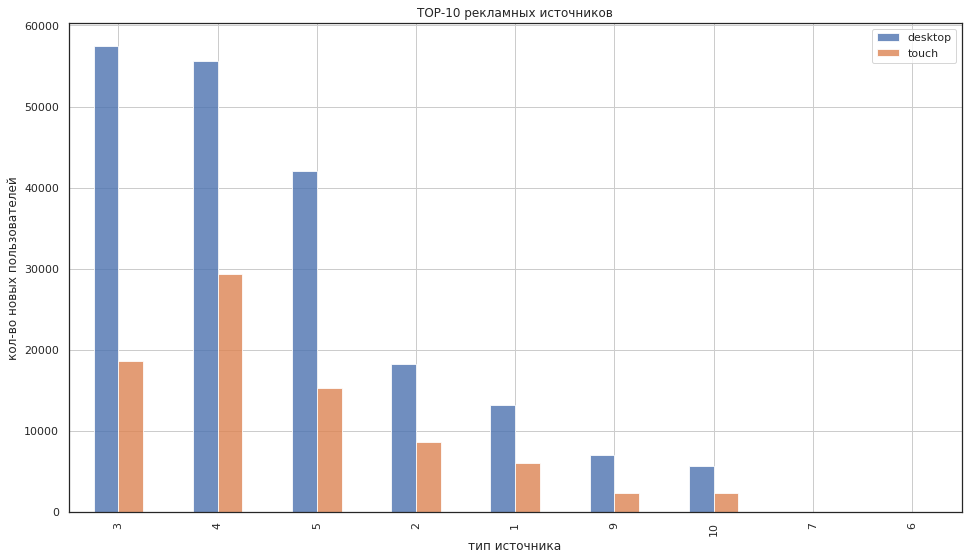

In [203]:
devices2 = visits_data.pivot_table(index=['source id'], columns ='device', values='uid', aggfunc=['nunique'])
devices2.columns = ['desktop', 'touch']
#display(devices2.head())

devices3 = devices2.pivot_table(index="source id", values={"desktop", "touch"}, aggfunc="sum").sort_values(by='desktop', ascending = False)
#display(devices3)
devices3.plot(kind='bar', title='TOP-10 рекламных источников', figsize=(16,9), grid=True, alpha=0.8) 
plt.xlabel("тип источника")
plt.ylabel("кол-во новых пользователей")

Количество новых пользователей соотвествует объему маркетинговых расходов. Чем больше расходов на маркетинг в конкретном рекламном источнике, тем выше количество новых пользователей из данного источника. ТОП-10 практически идентична для обоих типов устройств, за исключением источника 4,  приоритетного для мобильных устройств.

Проверим, сколько новых пользователей по типам устройств появляется в месяц.

In [204]:
device_per_month = users.pivot_table(index=['device'], columns ='cohort_lifetime', values='uid', aggfunc=['nunique'])
print('Ср.кол-во новых пользователей в месяц (тип устройства desktop): ', (device_per_month.loc['desktop'].sum() / 12).round(0))
print('Ср.кол-во новых пользователей в месяц (тип устройства touch): ', (device_per_month.loc['touch'].sum() / 12).round(0))
display(device_per_month.head())




Ср.кол-во новых пользователей в месяц (тип устройства desktop):  3802.0
Ср.кол-во новых пользователей в месяц (тип устройства touch):  1047.0


nunique                                                     \
cohort_lifetime      0     1     2     3     4     5     6    7    8    9    
device                                                                       
desktop           29803  3843  2551  2121  1796  1552  1227  960  672  515   
touch              7764  1234   819   633   534   441   350  264  210  139   

                           
cohort_lifetime   10   11  
device                     
desktop          331  259  
touch            103   75

Выясним, сколько всего пользователей посещало сайт каждый месяц в зависимости от типа устройства.

In [205]:
active_device_per_month = users.pivot_table(index=['device'], columns ='cohort_lifetime', values='uid', aggfunc=['count'])
print('Ср.кол-во активных пользователей в месяц (тип устройства desktop): ', (active_device_per_month.loc['desktop'].sum() / 12).round(0))
print('Ср.кол-во активных пользователей в месяц (тип устройства touch): ', (active_device_per_month.loc['touch'].sum() / 12).round(0))
display(active_device_per_month.head())

Ср.кол-во активных пользователей в месяц (тип устройства desktop):  59433.0
Ср.кол-во активных пользователей в месяц (тип устройства touch):  4051.0


count                                                   \
cohort_lifetime     0      1      2      3      4      5      6      7    
device                                                                    
desktop          94527  81183  72817  77500  72048  54700  70871  50723   
touch            16961   6424   3721   3596   2733   3000   2440   3289   

                                             
cohort_lifetime     8      9      10     11  
device                                       
desktop          45161  43329  27127  23206  
touch             2754   2186    536    975

Появление новых пользователей по двум типам устройств снижается с каждой когортой, особенно пользователей с мобильными устройствами. В среднем, приходит 3 802 с настольным устройством и 1 047 с мобильным.

В основном, активные пользователи - это первая когорта для обоих типов устройств. За весь период ежемесячно в среднем 59 433 посетителя сайта заходили с настольных устройств и 4051 с мобильных. Количество активных пользователей с мобильными устройствами заметно снижается - почти в 17 раз. 

##### Сколько стоило привлечение одного покупателя из каждого источника?

Мы должны рассчитать CAC (от англ. customer acquisition cost) — стоимость привлечения клиента. 
При этом, LTV должно быть больше CAC, если с экономикой одного покупателя все в порядке.



Группируем когорты расходов по столбцу с месяцем, необходимо учесть [ ] для того чтобы группировка стала названием столбца.

In [206]:
costs_month = costs_cohorts.groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
display(costs_month)


,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Добавим ежемесячные расходы в основной датасет report

In [207]:
total = pd.merge(report, costs_month, left_on='first_order_month', right_on='costs_month')
display(total.head())

,first_order_month,buyers,order_month,revenue,revenue_per_cohort,cohort_lifetime,ltv,costs_month,costs
0,2017-06-01,2023,2017-06-01,9557.49,4.72,0,4.72,2017-06-01,18015.0
1,2017-06-01,2023,2017-07-01,981.82,0.49,1,0.49,2017-06-01,18015.0
2,2017-06-01,2023,2017-08-01,885.34,0.44,2,0.44,2017-06-01,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,0.95,3,0.95,2017-06-01,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,1.02,4,1.02,2017-06-01,18015.0


Рассчитаем САС по формуле ежемесячные расходы / кол-во покупателей в когорте

In [208]:
total['cac'] = total['costs'] / total['buyers']
total.head()

,first_order_month,buyers,order_month,revenue,revenue_per_cohort,cohort_lifetime,ltv,costs_month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4.72,0,4.72,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,0.49,1,0.49,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,0.44,2,0.44,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,0.95,3,0.95,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1.02,4,1.02,2017-06-01,18015.0,8.905091


Посмотрим, какой среднемесячный показатель САС в когортах

In [209]:
cac_pivot = total.pivot_table(
        index='first_order_month', 
        values='cac', 
        aggfunc='mean').round(2).fillna(' ')
display(cac_pivot)


,cac
first_order_month,
2017-06-01,8.91
2017-07-01,9.49
2017-08-01,10.80
2017-09-01,9.44
2017-10-01,8.37
2017-11-01,9.29
2017-12-01,8.74
2018-01-01,9.94
2018-02-01,8.96


Самый высокий САС в когорте 2, т.к. в этот месяц было потрачено меньше всего, пользователей также было меньше, чем в другие периоды. В целом, САС ведет себя равномерно - нет резких взлетов или падений. Только к концу периода он снижается до 7.44

Рассмотрим среднее значение данного коэффициента за весь период.

Среднее значение САС:  9.32


(8.65, 9.6)

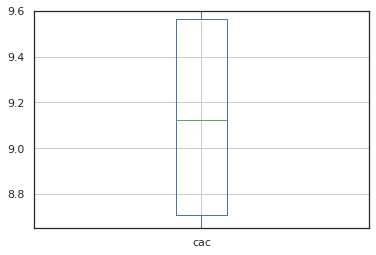

In [210]:
cac_mean = total['cac'].mean().round(2)
print('Среднее значение САС: ', cac_mean)
cac_pivot.boxplot(['cac'])
plt.ylim(8.65, 9.6)
#plt.xlabel("срок жизни когорты")
#plt.ylabel("значение САС")

Среднемесячный САС, т.е. затраты на привлечение одного покупателя, составляет диапазон 9.10-9.32 рублей. Привлечение пользователей из когорты 1, 3, 5 когорты обходились компании примерно в эту сумму. Выше среднего обошлась когорта 2, расходов было мало, следовательно, и пользователей появилось также мало. Когорты 0, 4, 6, 8, 9 потребовали вложений ниже среднего, т.к. в итоге привлекли много пользователей.

Выясним, какой из средних показателей данных коэффициентов по всем когортам меньше и сходится ли экономика одного покупателя.

In [211]:
display(ltv_mean)
display(cac_mean)
if ltv_mean > cac_mean:
    print('Экономика одного покупателя сходится')
else:
    print('Экономика одного покупателя не сходится')

6.99

9.32

Экономика одного покупателя не сходится


В среднем, CAC гораздо выше LTV. Компания потратила 9.32 рубля на привлечение каждого пользователя, но прибыль с каждого получилась ниже - около 7 рублей. Необходимо сокращать расходы или повышать прибыль.

##### На сколько окупились расходы? (ROI) 

Чтобы определить окупаемость расходов нам нужно рассчитать ROI (от англ. return on investments) или точнее ROMI (от англ. return on marketing investments), т.к. речь идет о маркетинговых расходах. Точка окупаемости - ROMI=100%

Добавим столбец расчета ROMI по сокращенной формуле: 

ROMI рекламной кампании = валовая прибыль из этой кампании / затраты.

In [212]:
total['romi'] = total['ltv'] / total['cac']
result = total.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')

result.cumsum(axis=1).round(2).fillna(' ')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.3,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.89,
2017-08-01,0.49,0.53,0.58,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.88,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.5,0.5,0.51,,,,,,,,


Мы видим следующее:
    - Нулевая когорта окупилась на 6 месяц (ROMI = 1.05).
    - Третья когорта(сентябрь) окупилась быстрее всего на третий месяц (ROMI=1.19)
    - Только нулевая и третья когорта окупили себя.


Проверим среднее ROMI по каждому сроку жизни когорты

In [213]:
result.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.540788
1     0.582061
2     0.631207
3     0.719778
4     0.782841
5     0.859997
6     0.896532
7     0.969995
8     1.053654
9     0.964703
10    1.095217
11    1.334068
dtype: float64

In [333]:
print('Общий средний ROMI: ', result.cumsum(axis=1).mean(axis=0).mean().round(2))

Общий средний ROMI:  0.87


Когорты окупают себя к 8, 10 или 11-му месяцу жизни. Можно сказать, что инвестиции от рекламной компании были долгосрочные, поэтому половина когорт еще не вышла на срок окупаемости и, возможно, через год от даты начала покупательной активности пользователе они окупятся.

Рассмотрим ROMI для каждого источника, чтобы определить убыточные и прибыльные.
Мы сделаем срез данных по каждому источнику и повторим всю процедуру расчета LTV и CAC для определения ROMI. Источники 6, 7, 8 не рассматриваем, т.к.финансирования они не получали.

Создаем срез данных для источника 1, начиная с таблицы по группировке ежемесячных расходов по когортам.

In [283]:
costs_month_source_1 = costs_cohorts[costs_cohorts['source id'] == 1].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
#display(costs_month_source_1)

Создаем срез данных по выручке для источника 1

In [292]:
users_source_1 = users[users['source id'] == 1]
display(users_source.head())

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration,...,activity_month,first_activity_month,cohort_lifetime,buy ts,revenue,buy_day,first_day,visit_order_dif,first_order_date,first_order_month
64,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,2017-10-31,780,...,2017-10-01,2017-06-01,4,2017-06-25 08:54:00,3.67,2017-06-19 08:54:00,2017-05-29 14:17:00,20,2017-06-25 08:54:00,2017-06-01
65,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,2017-10-31,780,...,2017-10-01,2017-06-01,4,2017-06-26 09:14:00,3.67,2017-06-26 09:14:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01
66,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,2017-10-31,780,...,2017-10-01,2017-06-01,4,2017-06-26 12:12:00,12.22,2017-06-26 12:12:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01
67,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,2017-10-31,780,...,2017-10-01,2017-06-01,4,2017-06-28 19:25:00,23.22,2017-06-26 19:25:00,2017-05-29 14:17:00,28,2017-06-25 08:54:00,2017-06-01
68,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,2017-10-31,780,...,2017-10-01,2017-06-01,4,2017-09-07 20:09:00,27.25,2017-09-04 20:09:00,2017-05-29 14:17:00,98,2017-06-25 08:54:00,2017-06-01


Добавим количество пользователей  к данным по выручке

In [294]:
report_source_1 = pd.merge(buyers, users_source_1, on='first_order_month')
display(report_source.head())

,first_order_month,buyers,device,end ts,source id,start ts,uid,session_year,session_month,session_week,...,first_activity_date,activity_month,first_activity_month,cohort_lifetime,buy ts,revenue,buy_day,first_day,visit_order_dif,first_order_date
0,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-04 14:17:00,2017-10-01,2017-06-01,4,2017-06-25 08:54:00,3.67,2017-06-19 08:54:00,2017-05-29 14:17:00,20,2017-06-25 08:54:00
1,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-04 14:17:00,2017-10-01,2017-06-01,4,2017-06-26 09:14:00,3.67,2017-06-26 09:14:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00
2,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-04 14:17:00,2017-10-01,2017-06-01,4,2017-06-26 12:12:00,12.22,2017-06-26 12:12:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00
3,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-04 14:17:00,2017-10-01,2017-06-01,4,2017-06-28 19:25:00,23.22,2017-06-26 19:25:00,2017-05-29 14:17:00,28,2017-06-25 08:54:00
4,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-04 14:17:00,2017-10-01,2017-06-01,4,2017-09-07 20:09:00,27.25,2017-09-04 20:09:00,2017-05-29 14:17:00,98,2017-06-25 08:54:00


Объединяем новую таблицу с основными данными по выручке, расходам и покупателям. 

In [295]:
total_source_1 = pd.merge(report_source_1, costs_month_source_1, left_on='first_order_month', right_on='costs_month')
display(total_source_1.head())

,first_order_month,buyers,device,end ts,source id,start ts,uid,session_year,session_month,session_week,...,first_activity_month,cohort_lifetime,buy ts,revenue,buy_day,first_day,visit_order_dif,first_order_date,costs_month,costs
0,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-01,4,2017-06-25 08:54:00,3.67,2017-06-19 08:54:00,2017-05-29 14:17:00,20,2017-06-25 08:54:00,2017-06-01,1125.61
1,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-01,4,2017-06-26 09:14:00,3.67,2017-06-26 09:14:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01,1125.61
2,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-01,4,2017-06-26 12:12:00,12.22,2017-06-26 12:12:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01,1125.61
3,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-01,4,2017-06-28 19:25:00,23.22,2017-06-26 19:25:00,2017-05-29 14:17:00,28,2017-06-25 08:54:00,2017-06-01,1125.61
4,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-01,4,2017-09-07 20:09:00,27.25,2017-09-04 20:09:00,2017-05-29 14:17:00,98,2017-06-25 08:54:00,2017-06-01,1125.61


Рассчитываем ежемесячный и средний LTV для источника 1

In [301]:
total_source_1['ltv'] = (total_source_1['revenue'] / total_source_1['buyers']).round(2)

In [314]:
ltv_cohorts_source_1 =total_source_1.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_1.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
display(ltv_cohorts_source_1)


,first_order_month,ltv_sum_1,ltv_mean_1
0,2017-06-01,430.03,0.00
1,2017-07-01,122.97,0.01
2,2017-08-01,74.69,0.01
3,2017-09-01,67.12,0.01
4,2017-10-01,8.70,0.00
5,2017-11-01,21.49,0.00
6,2017-12-01,1.47,0.00
7,2018-01-01,11.34,0.00
8,2018-02-01,1.24,0.00
9,2018-03-01,36.81,0.00


In [309]:
ltv_mean_source_1 = ltv_cohorts_source_1['ltv_sum_1'].mean().round(2)
print('Общий средний LTV по источнику 1:', ltv_mean_source_1) 

Общий средний LTV по источнику 1: 65.78


Рассчитываем САС для источника 1

In [316]:
total_source_1['cac'] = (total_source_1['costs'] / total_source_1['buyers']).round(2)
total_source_1.head()

,first_order_month,buyers,device,end ts,source id,start ts,uid,session_year,session_month,session_week,...,buy ts,revenue,buy_day,first_day,visit_order_dif,first_order_date,costs_month,costs,ltv,cac
0,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-25 08:54:00,3.67,2017-06-19 08:54:00,2017-05-29 14:17:00,20,2017-06-25 08:54:00,2017-06-01,1125.61,0.00,0.56
1,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-26 09:14:00,3.67,2017-06-26 09:14:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01,1125.61,0.00,0.56
2,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-26 12:12:00,12.22,2017-06-26 12:12:00,2017-05-29 14:17:00,27,2017-06-25 08:54:00,2017-06-01,1125.61,0.01,0.56
3,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-06-28 19:25:00,23.22,2017-06-26 19:25:00,2017-05-29 14:17:00,28,2017-06-25 08:54:00,2017-06-01,1125.61,0.01,0.56
4,2017-06-01,2023,desktop,2017-10-31 14:45:00,1,2017-10-31 14:32:00,8056418121947262981,2017,10,44,...,2017-09-07 20:09:00,27.25,2017-09-04 20:09:00,2017-05-29 14:17:00,98,2017-06-25 08:54:00,2017-06-01,1125.61,0.01,0.56


In [317]:
cac_mean_source_1 = total_source_1['cac'].mean().round(2)
print('Среднее значение САС по источнику 1: ', cac_mean_source_1)

Среднее значение САС по источнику 1:  0.57


Находим ROMI для источника 1 по когортам

In [321]:
total_source_1['romi'] = total_source_1['ltv'] / total_source_1['cac']
result_source_1 = total_source_1.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_1.cumsum(axis=1).mean(axis=0)


cohort_lifetime
0     0.004429
1     0.009566
2     0.014292
3     0.019647
4     0.025681
5     0.031039
6     0.036330
7     0.043483
8     0.052931
9     0.059942
10    0.065712
11    0.071032
dtype: float64

Рассчитаем среднее ROMI для всех когорт по источнику 1

In [324]:
print('Ср.ROMI для источника 1: ', result_source_1.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 1:  0.04


Рекламный источник 1 еще не окупился, хотя его LTV достаточно высокий и показатель ROMI растет с каждой когортой и составляет 7.1%

Рассчитываем ROMI для источника 2 по всем когортам и средний показатель

In [328]:
costs_month_source_2 = costs_cohorts[costs_cohorts['source id'] == 2].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_2 = users[users['source id'] == 2]
report_source_2 = pd.merge(buyers, users_source_2, on='first_order_month')
total_source_2 = pd.merge(report_source_2, costs_month_source_2, left_on='first_order_month', right_on='costs_month')
total_source_2['ltv'] = (total_source_2['revenue'] / total_source_2['buyers']).round(2)
ltv_cohorts_source_2 =total_source_2.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_2.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_2 = ltv_cohorts_source_2['ltv_sum_1'].mean().round(2)
total_source_2['cac'] = (total_source_2['costs'] / total_source_2['buyers']).round(2)
cac_mean_source_2 = total_source_2['cac'].mean().round(2)
total_source_2['romi'] = total_source_2['ltv'] / total_source_2['cac']
result_source_2 = total_source_2.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_2.cumsum(axis=1).mean(axis=0)


cohort_lifetime
0     0.001699
1     0.003579
2     0.006360
3     0.010557
4     0.013199
5     0.016483
6     0.018859
7     0.021964
8     0.024677
9     0.027168
10    0.031195
11    0.034116
dtype: float64

In [329]:
print('Ср.ROMI для источника 2: ', result_source_2.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 2:  0.02


ROMI источника 2 растет, но до окупаемости еще далеко - 3.4%

Рассчитываем ROMI для источника 3 по всем когортам и средний показатель

In [330]:
costs_month_source_3 = costs_cohorts[costs_cohorts['source id'] == 3].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_3 = users[users['source id'] == 3]
report_source_3 = pd.merge(buyers, users_source_3, on='first_order_month')
total_source_3 = pd.merge(report_source_3, costs_month_source_3, left_on='first_order_month', right_on='costs_month')
total_source_3['ltv'] = (total_source_3['revenue'] / total_source_3['buyers']).round(2)
ltv_cohorts_source_3 =total_source_3.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_3.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_3 = ltv_cohorts_source_3['ltv_sum_1'].mean().round(2)
total_source_3['cac'] = (total_source_3['costs'] / total_source_3['buyers']).round(2)
cac_mean_source_3 = total_source_3['cac'].mean().round(2)
total_source_3['romi'] = total_source_3['ltv'] / total_source_3['cac']
result_source_3 = total_source_3.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_3.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.000192
1     0.000490
2     0.000971
3     0.001755
4     0.002307
5     0.002827
6     0.003443
7     0.003765
8     0.004208
9     0.005110
10    0.005321
11    0.005926
dtype: float64

In [334]:
print('Ср.ROMI для источника 3: ', result_source_3.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 3:  0.0


Самый финансируемый источник почти не показывает прибыли, но и отрицательного ROMI нет - 0.5%

Рассчитываем ROMI для источника 4 по всем когортам и средний показатель

In [335]:
costs_month_source_4 = costs_cohorts[costs_cohorts['source id'] == 4].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_4 = users[users['source id'] == 4]
report_source_4 = pd.merge(buyers, users_source_4, on='first_order_month')
total_source_4 = pd.merge(report_source_4, costs_month_source_4, left_on='first_order_month', right_on='costs_month')
total_source_4['ltv'] = (total_source_4['revenue'] / total_source_4['buyers']).round(2)
ltv_cohorts_source_4 =total_source_4.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_4.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_4 = ltv_cohorts_source_4['ltv_sum_1'].mean().round(2)
total_source_4['cac'] = (total_source_4['costs'] / total_source_4['buyers']).round(2)
cac_mean_source_4 = total_source_4['cac'].mean().round(2)
total_source_4['romi'] = total_source_4['ltv'] / total_source_4['cac']
result_source_4 = total_source_4.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_4.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.000568
1     0.001309
2     0.002268
3     0.003400
4     0.004160
5     0.005446
6     0.006878
7     0.008241
8     0.009576
9     0.010803
10    0.013230
11    0.015693
dtype: float64

In [336]:
print('Ср.ROMI для источника 4: ', result_source_4.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 4:  0.01


Источник 4 также показывает рост ROMI  к последней когорте, но окупаемости нет - 1.5%

Рассчитываем ROMI для источника 5 по всем когортам и средний показатель

In [337]:
costs_month_source_5 = costs_cohorts[costs_cohorts['source id'] == 5].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_5= users[users['source id'] == 5]
report_source_5 = pd.merge(buyers, users_source_5, on='first_order_month')
total_source_5 = pd.merge(report_source_5, costs_month_source_5, left_on='first_order_month', right_on='costs_month')
total_source_5['ltv'] = (total_source_5['revenue'] / total_source_5['buyers']).round(2)
ltv_cohorts_source_5 =total_source_5.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_5.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_5 = ltv_cohorts_source_5['ltv_sum_1'].mean().round(2)
total_source_5['cac'] = (total_source_5['costs'] / total_source_5['buyers']).round(2)
cac_mean_source_5 = total_source_5['cac'].mean().round(2)
total_source_5['romi'] = total_source_5['ltv'] / total_source_5['cac']
result_source_5 = total_source_5.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_5.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.002123
1     0.003717
2     0.005054
3     0.006941
4     0.008394
5     0.010895
6     0.012040
7     0.013433
8     0.014590
9     0.017622
10    0.017287
11    0.021353
dtype: float64

In [338]:
print('Ср.ROMI для источника 5: ', result_source_5.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 5:  0.01


ROMI источника 5 выше, чем у источника 4, но ср.показатель также мал - 2.1%.

Рассчитываем ROMI для источника 9 по всем когортам и средний показатель

In [339]:
costs_month_source_9 = costs_cohorts[costs_cohorts['source id'] == 9].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_9= users[users['source id'] == 9]
report_source_9 = pd.merge(buyers, users_source_9, on='first_order_month')
total_source_9 = pd.merge(report_source_9, costs_month_source_9, left_on='first_order_month', right_on='costs_month')
total_source_9['ltv'] = (total_source_9['revenue'] / total_source_9['buyers']).round(2)
ltv_cohorts_source_9 =total_source_9.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_9.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_9 = ltv_cohorts_source_9['ltv_sum_1'].mean().round(2)
total_source_9['cac'] = (total_source_9['costs'] / total_source_9['buyers']).round(2)
cac_mean_source_9 = total_source_9['cac'].mean().round(2)
total_source_9['romi'] = total_source_9['ltv'] / total_source_9['cac']
result_source_9 = total_source_9.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_9.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.002719
1     0.005311
2     0.009724
3     0.013934
4     0.016152
5     0.017917
6     0.020738
7     0.023379
8     0.029708
9     0.034063
10    0.041374
11    0.056686
dtype: float64

In [340]:
print('Ср.ROMI для источника 9: ', result_source_9.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 9:  0.02


Источник 9 на последних местах по финансированию, но окупаемость (5.7%) у него лучше, чем 3, 4, 5.

Рассчитываем ROMI для источника 10 по всем когортам и средний показатель

In [341]:
costs_month_source_10 = costs_cohorts[costs_cohorts['source id'] == 10].groupby(['costs_month']).agg({'costs': 'sum'}).reset_index()
users_source_10= users[users['source id'] == 10]
report_source_10 = pd.merge(buyers, users_source_10, on='first_order_month')
total_source_10 = pd.merge(report_source_10, costs_month_source_10, left_on='first_order_month', right_on='costs_month')
total_source_10['ltv'] = (total_source_10['revenue'] / total_source_10['buyers']).round(2)
ltv_cohorts_source_10 =total_source_10.groupby(['first_order_month']).agg({'ltv':['sum','mean']}).round(2).reset_index()
ltv_cohorts_source_10.columns = ['first_order_month','ltv_sum_1', 'ltv_mean_1']
ltv_mean_source_10 = ltv_cohorts_source_10['ltv_sum_1'].mean().round(2)
total_source_10['cac'] = (total_source_10['costs'] / total_source_10['buyers']).round(2)
cac_mean_source_10 = total_source_10['cac'].mean().round(2)
total_source_10['romi'] = total_source_10['ltv'] / total_source_10['cac']
result_source_10 = total_source_10.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')
result_source_10.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.004067
1     0.009678
2     0.007119
3     0.007120
4     0.010737
5     0.014855
6     0.005196
7     0.020790
8     0.036670
9     0.049379
10    0.043987
11    0.066257
dtype: float64

In [342]:
print('Ср.ROMI для источника 10: ', result_source_10.cumsum(axis=1).mean(axis=0).mean().round(2))

Ср.ROMI для источника 10:  0.02


ROMI источника 10 ежемесячно расчет, но окупаемости еще нет - 6.6%

Теперь мы можем рассмотреть показатель САС по каждому источнику


In [366]:
print('CAC источника 1: ', cac_mean_source_1)
print('CAC источника 2: ', cac_mean_source_2)
print('CAC источника 3: ', cac_mean_source_3)
print('CAC источника 4: ', cac_mean_source_4)
print('CAC источника 5: ', cac_mean_source_5)
print('CAC источника 9: ', cac_mean_source_9)
print('CAC источника 10: ', cac_mean_source_10)
cac_source = pd.DataFrame([['1', 0.57], ['2', 1.19], ['3', 3.91], ['4', 1.72], ['5', 1.37], ['9', 0.16], ['10', 0.16]], columns=['source id', 'cac'])
display(cac_source.sort_values(by='cac', ascending=False))

CAC источника 1:  0.57
CAC источника 2:  1.19
CAC источника 3:  3.91
CAC источника 4:  1.72
CAC источника 5:  1.37
CAC источника 9:  0.16
CAC источника 10:  0.16


,source id,cac
2,3,3.91
3,4,1.72
4,5,1.37
1,2,1.19
0,1,0.57
5,9,0.16
6,10,0.16


Самым высоким оказался расход на привлечение одного покупателя у источника 3 - 3.91 рубля. Покупатели из источников 2, 4, 5 стоили компании от 1.19 до 1.72 рубля. На покупателей из источников 1, 9, 10 было потрачено меньше всего - до 0.6 рубля.

Создадим датафрейм с полученными средними значениями ROMI

,source id,mean_romi
0,1,0.04
1,2,0.02
5,9,0.02
6,10,0.02
3,4,0.01
4,5,0.01
2,3,0.00


Text(0, 0.5, 'Ср.коэффициент ROMI')

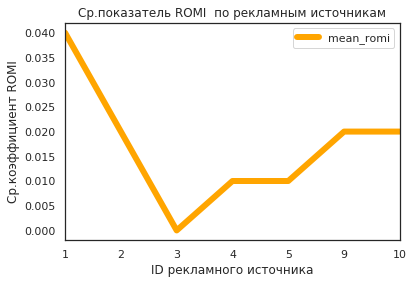

In [357]:
sources_romi = pd.DataFrame([['1',0.04], ['2', 0.02], ['3', 0.00], ['4', 0.01], ['5', 0.01], ['9', 0.02], ['10', 0.02]], columns=['source id', 'mean_romi'])
display(sources_romi.sort_values(by='mean_romi', ascending=False))
sources_romi.plot(x='source id', y='mean_romi', linewidth=6, legend=True, color='orange')
plt.title('Ср.показатель ROMI  по рекламным источникам')
plt.xlabel('ID рекламного источника')
plt.ylabel('Ср.коэффициент ROMI')

<div id='id-Вывод'/>

### Вывод.

На основании анализа данных по посещениям сайта, заказам и маркетинговым расходам получена следующая информация:

- клиенты сайта: 228 169 уникальных пользователей, из них 36 523 покупателя. В среднем сайт посещают: 907 человек в день, 5 716 человек в неделю, 23 228 человек в месяц. 

- поведенческие метрики пользователя:
1. ср. кол-во сессий в день на одного пользователя:  1.08 (это хороший показатель, т.к. он может означать, что пользователь посещает сайт ежедневно, но только покупающий пользователь. Не покупающие заходя гораздо реже)
2. ср. продолжительность сессии в диапазоне от 60 до 600 секунд (возможно, 60 секунд достаточно для просмотра афишы кинотеатров или каких-либо других мероприятий на сайте). Для покупателей - 1259 секунд или 20 минут, для не заказывающих пользователей - 1407 секунд/23 минут.
3. срок первого заказа - через 130.17 дней после первого посещения сайта, т.е. через 4.3 месяца, что равноценно 16 неделе lifetime. Диапазон средних значений составляет от 40 до 210 дней  или от 5 до 30 недель. 
4. пользователю достаточно 9 сессий в день, чтобы начать делать заказы. При этом продолжительность одной сессии составляет 1259 секунд или 20 минут. При этом, пользователь, не делающий заказы, заходит на сайт гораздо реже, точно не каждый день. Возможно, нужно так привлекать пользователя, чтобы он заходил на сайт ежедневно и более одного раза.
5. пользовательские устройства регистрируются двух типов - desktop и touch. Количество устройств 282 165 больше, чем 228 169 уникальных пользователей, т.е. некоторые пользователи пользуются и настольными, и мобильными устройствами. 

- заказы: за весь период было совершено 50 415 покупок, при этом в месяц - 4 201, в день - 138. В среднем на каждого из 228 169 пользователей по 0.36 покупок в месяц 

- средний чек: с каждой новой когортой в первом сроке ее жизни наблюдается падение среднего чека с 6 до 3 рублей. Чек также уменьшается с каждым lifetime. Плюс в том, что почти все когорты сразу начинают с суммы,  близкой к среднему чеку - 5 рублей, но в следующем месяце продажи падают. Самые высокие чеки наблюдаются в первые месяцы жизни когорт. Возможно, пользователи посещают сайт, чтобы сделать заказ однократно, о чем также говорит падающий коэффициент удержания. Самыми прибыльными по общей выручке были сентябрьская и декабрьская когорты.

- Баланс маркетинговых расходов и прибыли. Расходы на маркетинг выделялись ежемесячно с сезонными пиками с октября 2017 г. до марта 2018 г., т.е. в праздничные периоды расходы увеличивались. Больше всего было выделено в декабре 2017 г. - 38 315 рублей. В среднем общий ежемесячный маркетинговый бюджет составлял 27 428 рублей. Мы рекомендуем отделу маркетинга сократить свои расходы, хотя бы до того момента, пока не станет понятной окупаемость новых когорт, которые пока не прожили свой 12-месячный срок жизни, т.к. такие метрики как LTV и CAC сейчас находятся не в балансе здоровой экономической ситуации: на каждого пользователя потрачено около 9 рублей, а получено только 7, т.е. мы получаем убыток в 2 рубля - в среднем за каждого. По некоторым когортам CAC достаточно высок, но все равно не приносит достаточное количество пользователей и прибыли. Важно, что количество новых пользователей соотвествует объему маркетинговых расходов. Согласно метрике ROMI окупились только 2 когорты из 12, но есть надежда, что это долгосрочные инвестиции, и остальные когорты еще придут к своей точке окупаемости. Возможно, есть варианты сделать сейчас маркетинговые инвестиции более краткосрочными, тем самым мы повысим ROMI и сократим период окупаемости хотя бы до 6 месяцев. Сейчас показатель указывает только на срок свыше 8  месяцев.

- Retention Rate необходимо поднимать, т.к. коэффициент упал с 7,9% до 4,8% почти сразу - на самой первом месяце жизни всех когорт. Возможно, все маркетинговые активности были направлены на привлечение клиентов, а не на удержание. Это важно, т.к. пользователи переходят в статус покупателей только на 4м месяце срока жизни когорты.

- Touch-пользователи: анализ распределения пользователей по типам устройств desktop  и touch сигнализирует о том, что важно срочно наращивать количество пользователей с устройствами touch (сейчас у нас около 30% от общего числа), т.к. таких пользователей по определению больше, и категория сайта не требует полноценной настольной версии, как, например, в случае компьютерных игр. При этом нужно обратить внимание на мобильную версию сайта, которая все и меньше, и меньше привлекает пользователей. Возможно, детально рассмотреть рекламный источник 4, который привлек больше всего пользователей с мобильными устройствами, и масштабировать его успехи на другие источники. 

- Рекламные источники: необходимо продолжать финансировать рекламные источники 3, 4, 5, которые привлекли больше всего пользователей, но нужна также диверсификация таких расходов - в этом году источники 6, 7, 8 не получали финансирования. Хотя небольшое количество пользователей приходило с источников 6 и 7. Стоит их детально рассмотреть, может быть забюджетировать их финансирование на следующий год. Самым высоким оказался расход на привлечение одного покупателя у источника 3 - 3.91 рубля. Покупатели из источников 2, 4, 5 стоили компании от 1.19 до 1.72 рубля. На покупателей из источников 1, 9, 10 было потрачено меньше всего - до 0.6 рубля. Наименее окупаемым оказался источник 3, т.к. больше всего расходов получил именно он. Источники 4 и 5 также принесли совсем мало прибыли. Источники 9 и 10 получили меньше всего расходов, но более высокий ROMI. Самым окупаемым получился источник 1, хотя он вышел только на 7.1% окупаемости

- Статус пользователя: необходимо быстрее переводить пользователей в статус покупателей, т.к. они составляют чуть менее 1/5 от всего числа пользователей.Если бы каждый пользователь совершил хотя бы одну покупку на сайте, то количество покупок выросло бы в 5 раз.
